<a href="https://colab.research.google.com/github/isj0/DeepLearning/blob/main/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## ***TRAIN/TEST SPLIT DATA***

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CS 7267-Machine Learning LAB/Boston.csv")
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [ ]:
df.rename(columns={'MEDV': 'House_Price'}, inplace=True)

In [ ]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [ ]:
input_data = df.iloc[:,:-1]
output_data = df["House_Price"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 0.25)

In [ ]:
df.shape

(506, 14)

In [ ]:
X_train.shape, y_train.shape

((379, 13), (379,))

In [ ]:
X_test.shape, y_test.shape

((127, 13), (127,))

# SUPERVISED LEARNING
- REGRESSION ANALYSIS ALGORITHMS
    - Linear Regression
        - Simple Linear Regression
        - Multi_Linear Regression
        - Lasso Regression
        - Ridge Regression
    - Non-Linear Regression
        - Polynomial Regression
        - Decision Tree Regression
        - Random Forests
        - Support Vector Machines
        - K-Nearest Neighbors


# SIMPLE LINEAR REGRESSION
    - Used in case of a single Input feature
    - Where there is a linear relationship between a input feature and output feature
    - y = m * x + b
        y = dependent variable  (output / prediction)
        x = independent variable (feature / input)
        m = slope/gradient/coefficient
        c = intercept
    - Regression Line / Best Fit Line : based on the dataset


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CS 7267-Machine Learning LAB/placement.csv")
df.head(3)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25


In [ ]:
df.isnull().sum()

,0
cgpa,0
package,0


In [ ]:
df.shape

(200, 2)

In [ ]:
x = df[["cgpa"]]        # Input
y = df["package"]       # Predict/Output


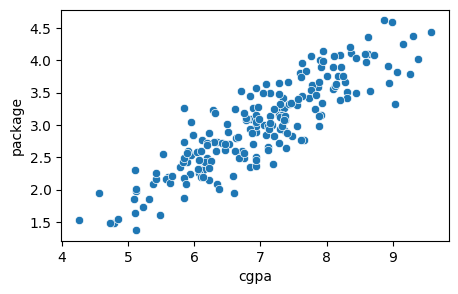

In [ ]:
plt.figure(figsize=(5,3))
sns.scatterplot(x="cgpa",y="package", data=df)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# y = m*x+ c

# this is m value - slope
lr.coef_

array([0.57425647])

In [ ]:
# This is c value - y intercept
lr.intercept_

np.float64(-1.0270069374542108)

In [ ]:
y = lr.coef_ * 6.89 + lr.intercept_
y

array([2.92962016])

In [ ]:
lr.predict([[6.89]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.92962016])

In [ ]:
lr.score(X_test, y_test) * 100

77.30984312051673

In [ ]:
y_pred = lr.predict(x)

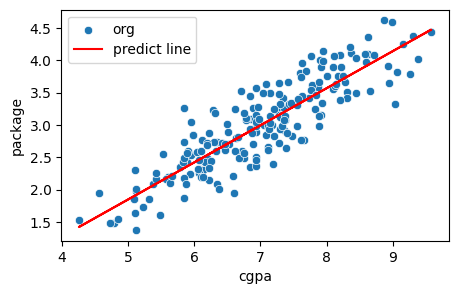

In [ ]:
plt.figure(figsize=(5,3))
sns.scatterplot(x="cgpa",y="package", data=df, label="orginal data")
plt.plot(df["cgpa"], y_pred, c="red", label="predict")
plt.legend(["org", "predict line"])
plt.savefig("Predict.jpg")
plt.show()

# MULTIPLE LINEAR REGRESSION

- It takes on more than one predictor variable to predict the response variable

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CS 7267-Machine Learning LAB/SalaryData.csv")

In [ ]:
df.head(3)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000
1,28,Female,Master's,Data Analyst,3.0,65000
2,45,Male,PhD,Senior Manager,15.0,150000


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [ ]:
df.rename(columns={'Years of Experience': 'Experience'}, inplace=True)

In [ ]:
df.head(3)

,Age,Gender,Education Level,Job Title,Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000
1,28,Female,Master's,Data Analyst,3.0,65000
2,45,Male,PhD,Senior Manager,15.0,150000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              373 non-null    int64  
 1   Gender           373 non-null    object 
 2   Education Level  373 non-null    object 
 3   Job Title        373 non-null    object 
 4   Experience       373 non-null    float64
 5   Salary           373 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 17.6+ KB


In [ ]:
df = df.drop(["Gender", "Education Level", "Job Title"], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         373 non-null    int64  
 1   Experience  373 non-null    float64
 2   Salary      373 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 8.9 KB


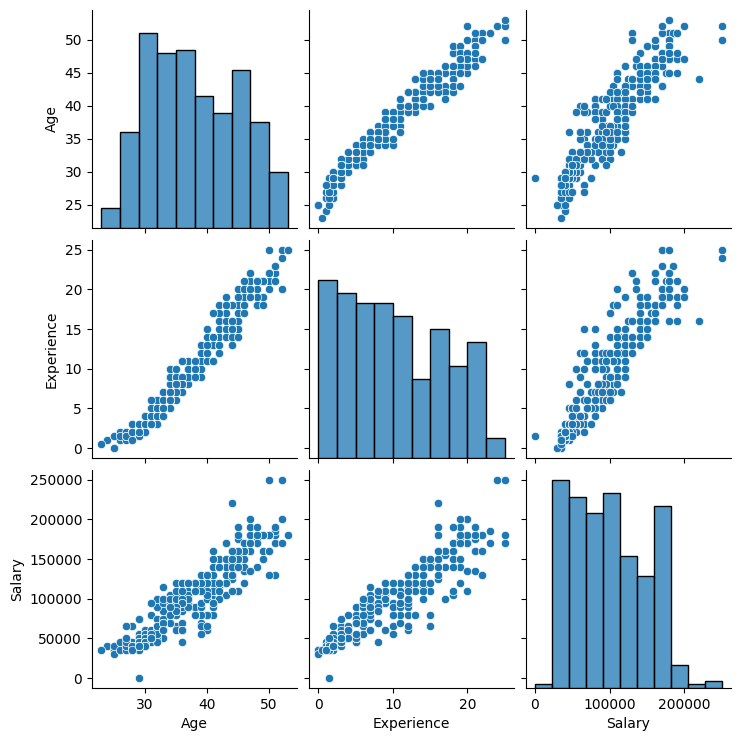

In [ ]:
sns.pairplot(data=df)
plt.show()

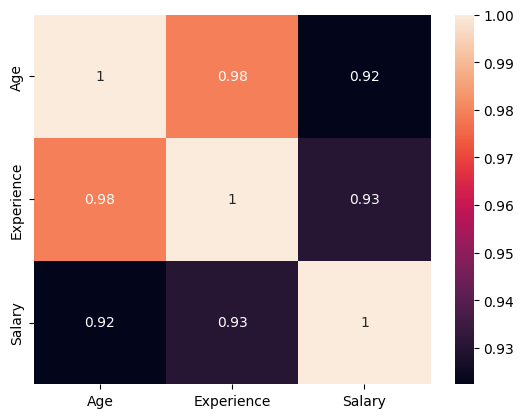

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
x = df.iloc[:,:-1]
y = df["Salary"]

In [ ]:
df.shape

(373, 3)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# y = m1*x1 + m2*x2 + c

In [ ]:
lr.score(X_test, y_test) * 100

88.85130944068203

In [ ]:
lr.coef_

array([2657.46419442, 4008.06199409])

In [ ]:
lr.intercept_

np.float64(-39815.40162188058)

In [ ]:
x.columns

Index(['Age', 'Experience'], dtype='object')

In [ ]:
y_pred = lr.coef_[0] * df["Age"] + lr.coef_[1] * df["Experience"] + lr.intercept_

In [ ]:
y_pred

,0
0,65263.762570
1,46617.781804
2,139891.417038
3,83909.743336
4,178533.976370
...,...
368,85260.341135
369,150608.736626
370,45267.184004
371,78594.814947


In [ ]:
lr.predict(X_test)

array([171912.18158604, 103906.32190127, 141242.01483791,  74586.75295282,
       142592.61263759, 149258.1388261 , 181235.17196897,  93276.46512361,
        54590.17438729,  94583.33151835, 123902.9004668 , 174569.64578046,
        37294.79142112,  91925.86732393, 133225.89084972,  54590.17438729,
        65263.76256989,  37948.22461849,  78594.81494691,  85260.34113542,
       101248.85770685,  94583.33151835, 143899.47903233,  67921.22676431,
        74586.75295282,  55940.77218697, 154573.06721493,  42609.71980995,
       118587.97207797, 150608.73662577,  46617.78180404, 125253.49826648,
        51932.71019287, 137233.95284382, 101248.85770685,  23310.30584673,
       169254.71739162,  47924.64819878, 146600.67463168,  58598.23638138,
        47924.64819878,  94583.33151835, 193259.35795125, 163896.05759785,
        42609.71980995, 141242.01483791,  99941.99131212,  39952.25561553,
        45267.18400437,  42609.71980995, 155923.66501461,  82602.876941  ,
       129217.82885563, 1

# POLYNOMIAL REGRESSION
    - Models the relationship between a dependent (y) and independent (x) as nth degree polynomial
    - y = b0 + b1*x1 + b2*x1^2 + ... + bn*x1^n

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CS 7267-Machine Learning LAB/polynomial_regression_dataset.csv")

In [ ]:
df.head(3)

,Level,Salary
0,7,171180.504378
1,4,65105.419757
2,8,192571.976551


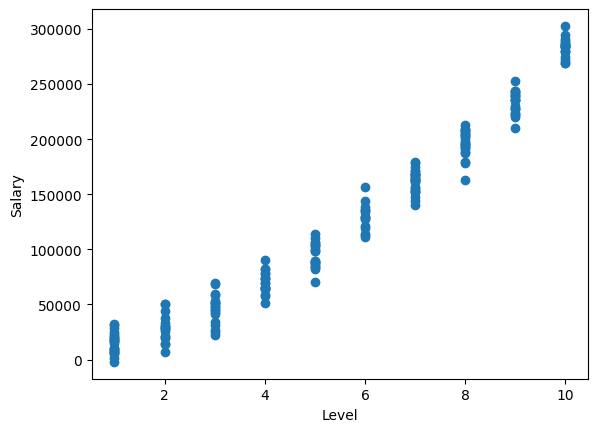

In [ ]:
plt.scatter(df["Level"], df["Salary"])
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [ ]:
df.corr()

,Level,Salary
Level,1.000000,0.980395
Salary,0.980395,1.000000


In [ ]:
x = df[["Level"]]
y = df["Salary"]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pf = PolynomialFeatures(degree=2)

In [ ]:
pf.fit(x)

PolynomialFeatures()

In [ ]:
x = pf.transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.score(X_test, y_test) * 100

98.69612176113883

In [ ]:
prd = lr.predict(x)

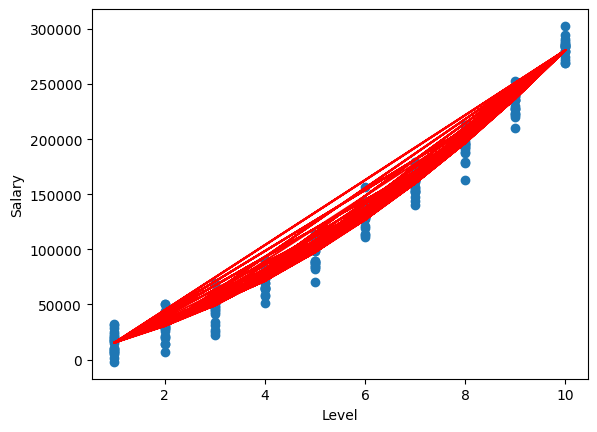

In [ ]:
plt.scatter(df["Level"], df["Salary"])
plt.plot(df["Level"], prd, c="red")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [ ]:
lr.coef_

array([   0.        , 9655.37071226, 1804.04749506])

In [ ]:
lr.intercept_

np.float64(3854.42036565709)

# COST FUNCTION
- Measure of how well the ML Model's prediction is matching actual data.
- Tells us how wrong the model is in estimating the relation between input and output parameters
- A lower score (cost) means better performance. A higher score means the model is making more mistakes.
- Regression COST function
    - Mean square Error, MSE
    - Root Mean Square Error, RMSE
    - Mean Absolute Error, MAE
    - R^2 Accuracy

- Classification Cost function
    - Binary Classification Cost f(x)
    - Multi-Class Classification Cost f(x)



Regression COST f(x)
    - Mean Squarerd Error: L2 Loss. Mean sqaured difference between actual & predicted values

# REGULARIZATION TECHNIQUES
    - L1 (Lasso Regularization)
    - L2 (Ridge Regularization)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CS 7267-Machine Learning LAB/sample_101_Housing.csv")

In [ ]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1483300570,20140908T000000,905000.0,4,2.50,3300,10250,1.0,0,0,...,7,2390,910,1946,1991,98040,47.5873,-122.249,1950,6045
96,3422049190,20150330T000000,247500.0,3,1.75,1960,15681,1.0,0,0,...,7,1960,0,1967,0,98032,47.3576,-122.277,1750,15616
97,1099611230,20140912T000000,199000.0,4,1.50,1160,6400,1.0,0,0,...,7,1160,0,1975,0,98023,47.3036,-122.378,1160,6400
98,722079104,20140711T000000,314000.0,3,1.75,1810,41800,1.0,0,0,...,7,1210,600,1980,0,98038,47.4109,-121.958,1650,135036


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             100 non-null    int64  
 1   date           100 non-null    object 
 2   price          100 non-null    float64
 3   bedrooms       100 non-null    int64  
 4   bathrooms      100 non-null    float64
 5   sqft_living    100 non-null    int64  
 6   sqft_lot       100 non-null    int64  
 7   floors         100 non-null    float64
 8   waterfront     100 non-null    int64  
 9   view           100 non-null    int64  
 10  condition      100 non-null    int64  
 11  grade          100 non-null    int64  
 12  sqft_above     100 non-null    int64  
 13  sqft_basement  100 non-null    int64  
 14  yr_built       100 non-null    int64  
 15  yr_renovated   100 non-null    int64  
 16  zipcode        100 non-null    int64  
 17  lat            100 non-null    float64
 18  long       

In [ ]:
# Move 'price' column to the end
df = df[[col for col in df.columns if col != 'price'] + ['price']]


In [ ]:
df.head(3)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7229300521,20141013T000000,2,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,231300.0
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0


In [ ]:
df.drop(columns=['date'], inplace=True)


/tmp/ipython-input-625340291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['date'], inplace=True)


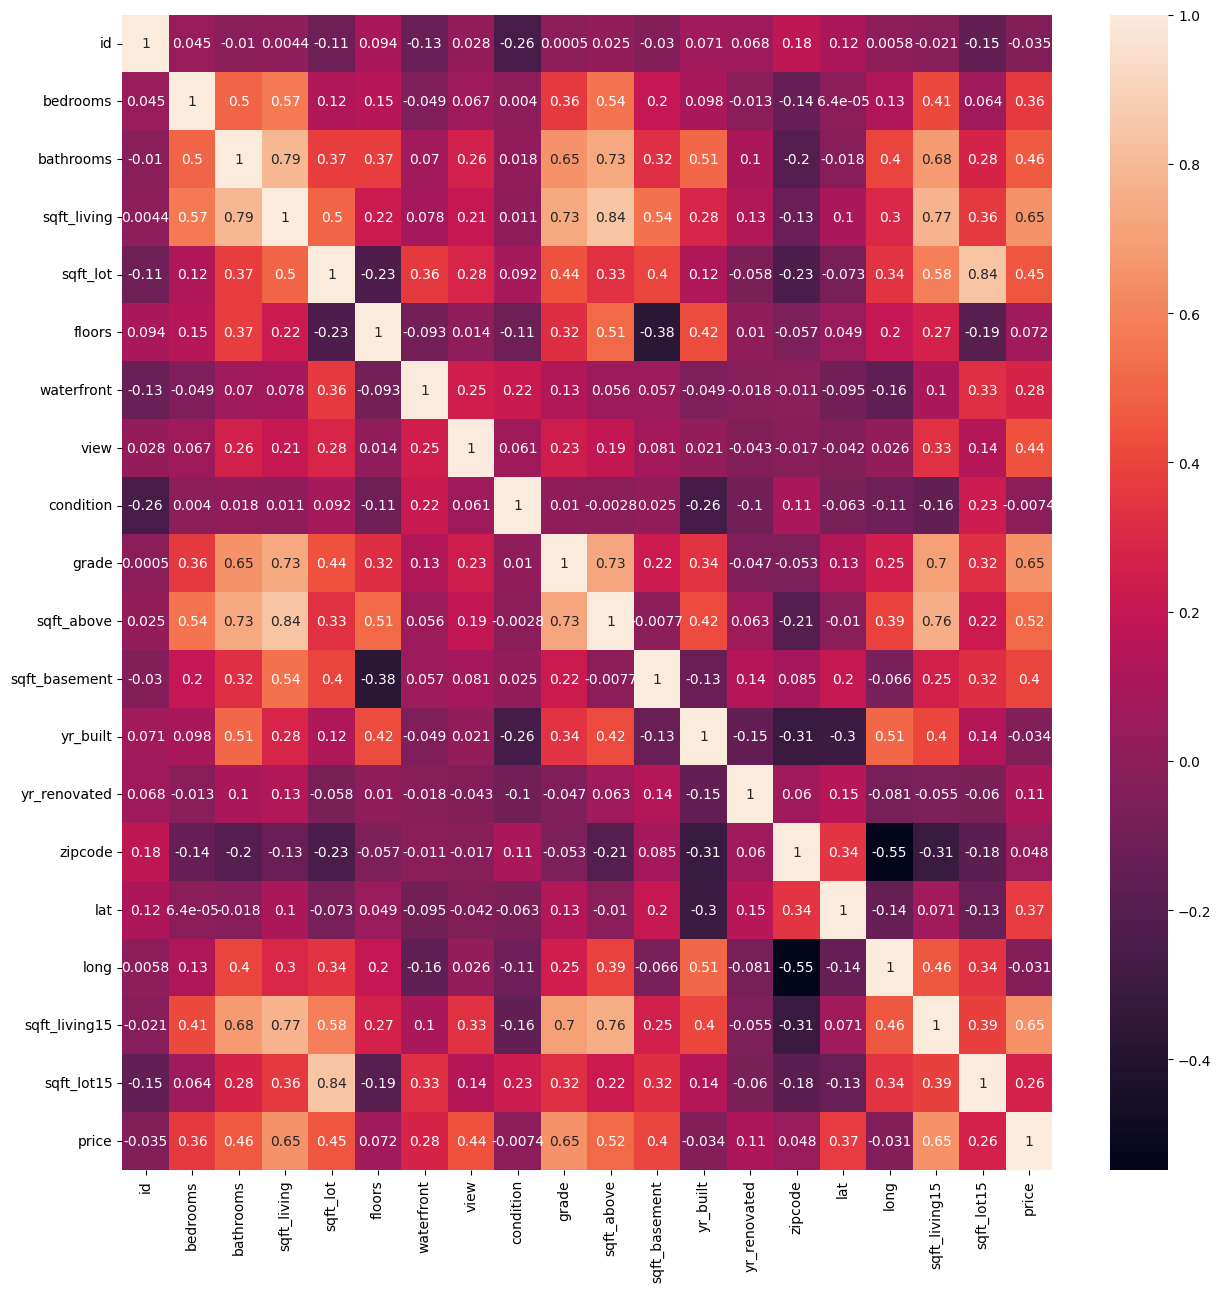

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()